# Machine Learning Workflow

Although we might don't use them all, the general structure of a machine learning project stays relatively constant: 

1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection
4. Establish a baseline and compare several machine learning models on a performance metric
5. Perform hyperparameter tuning on the best model to optimize it for the problem
6. Evaluate the best model on the testing set
7. Interpret the model results to the extent possible
8. Draw conclusions and write a well-documented report

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
# preview the data
train_data.head()
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.775,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.900,NaN,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.050,NaN,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S
576,577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.000,NaN,S


In [4]:
train_data.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Cleaning empty cells
train_data.drop(columns='Cabin',inplace=True)
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
test_df.drop(columns='Cabin',inplace=True)
test_df['Age'].fillna(train_data['Age'].mean(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [8]:
#let's drop few more columns which doesn't have any impact in our prediction
train_data.drop(columns=["Name","Ticket",'PassengerId'],inplace=True)
train_data
test_data=test_df.drop(columns=["Name","Ticket",'PassengerId'])

In [9]:
train_data.duplicated().sum()

111

<AxesSubplot:>

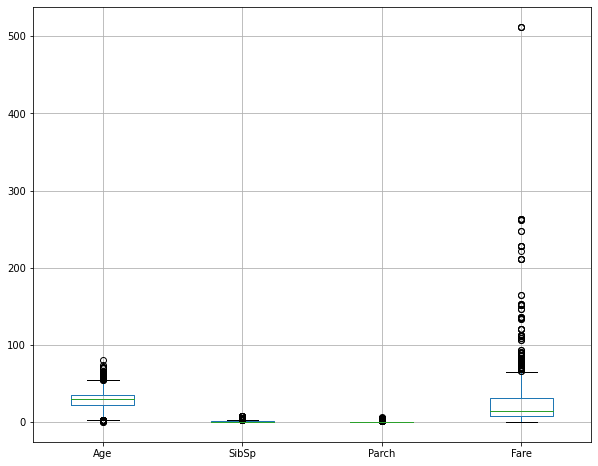

In [10]:
#checking for outliers
train_data.boxplot(column=['Age','SibSp','Parch','Fare'],figsize=(10,8),fontsize=10)

# Exploratory Data Analysis

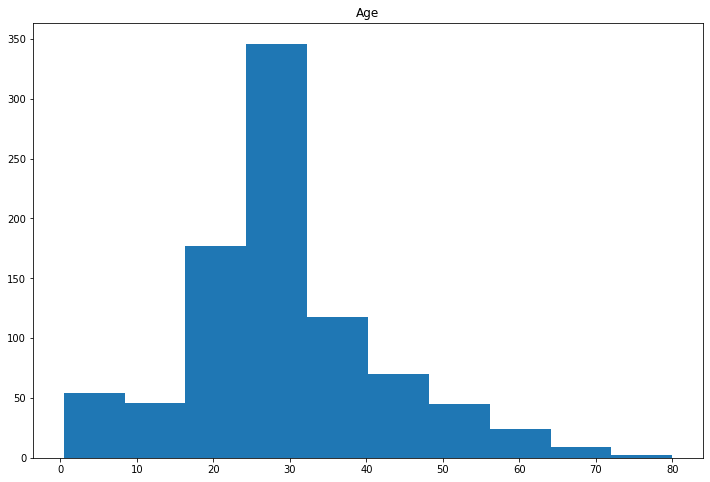

In [11]:
plt.figure(figsize=(12,8))
plt.hist(train_data['Age'])
plt.title('Age')
plt.show()

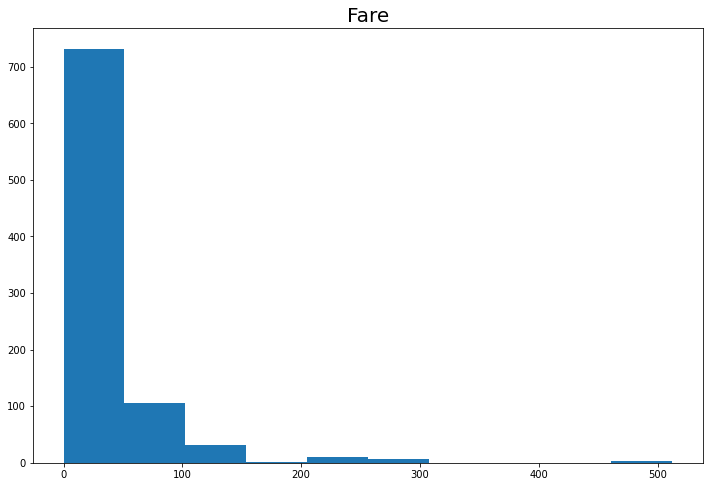

In [12]:
plt.figure(figsize=(12,8))
plt.hist(train_data['Fare'])
plt.title('Fare',size=20)
plt.show()

In [13]:
train_data.groupby("Pclass")["Embarked"].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

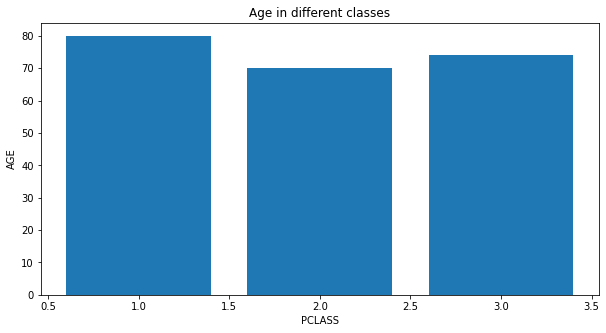

In [14]:
plt.figure(figsize=(10,5))
plt.bar(train_data['Pclass'], train_data['Age'])
plt.xlabel("PCLASS")
plt.ylabel("AGE")
plt.title("Age in different classes")
plt.show()

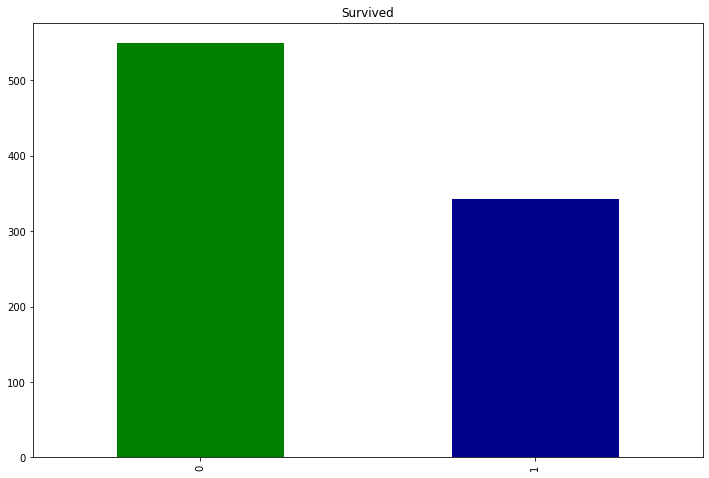

In [15]:
train_data["Survived"].value_counts().plot.bar(color=('green','darkblue'),figsize=(12,8))
plt.title("Survived")
plt.show()

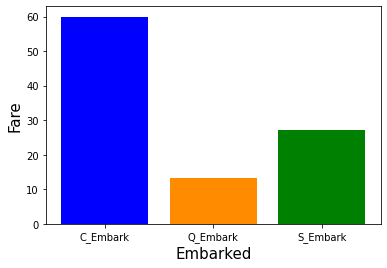

In [16]:
e=train_data.groupby("Embarked")["Fare"].mean()
x=["C_Embark","Q_Embark","S_Embark"]
y=[e[0],e[1],e[2]]
plt.bar(x,y,color=['b','darkorange','g'])
plt.xlabel("Embarked",fontsize=(15))
plt.ylabel("Fare",fontsize=(15))
plt.show()

Text(0.5, 1.0, 'Survived')

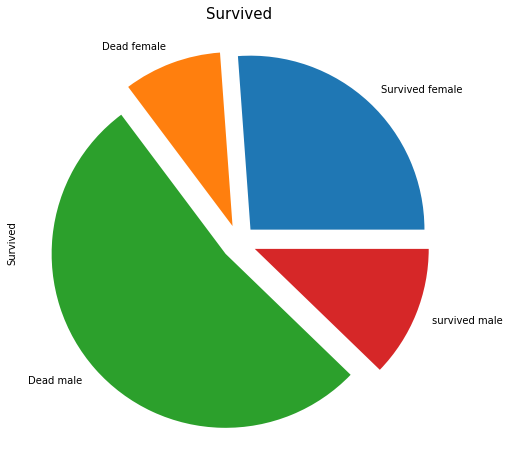

In [17]:
mylabels = ["Survived female", "Dead female", "Dead male", "survived male"]
train_data.groupby("Sex")["Survived"].value_counts().plot.pie(labels=mylabels,figsize=(12,8),explode=(0.1,0.1,0.1,0.1))
plt.title("Survived",fontsize=15)

Text(0.5, 1.0, 'Embarked')

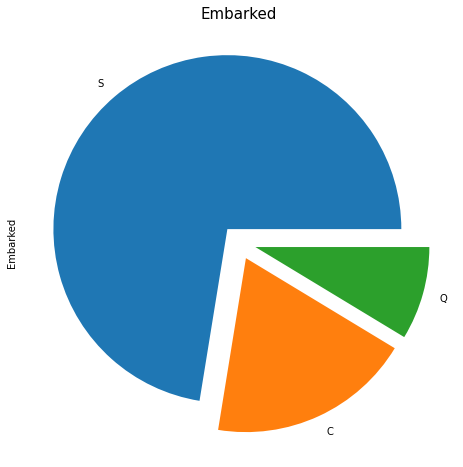

In [18]:
train_data["Embarked"].value_counts().plot.pie(figsize=(12,8),explode=(0.1,0.1,0.1))
plt.title("Embarked",fontsize=15)

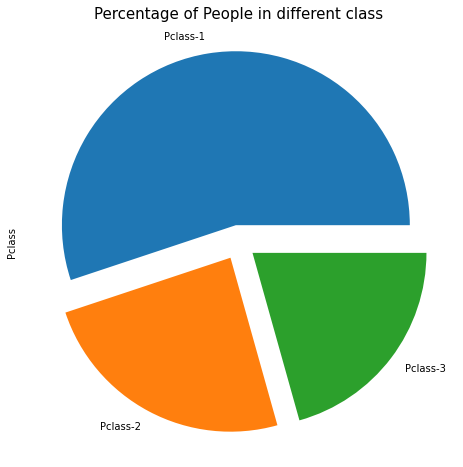

In [19]:
x=["Pclass-1","Pclass-2","Pclass-3"]
train_data["Pclass"].value_counts().plot.pie(labels=x,figsize=(12,8),explode=(0.1,0.1,0.1))
plt.title("Percentage of People in different class",fontsize=15)
plt.show()

In [20]:
correlations_data = train_data.corr()['Survived']
print(correlations_data.head(15), '\n')
print(correlations_data.tail(15))

Survived    1.000000
Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64 

Survived    1.000000
Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64


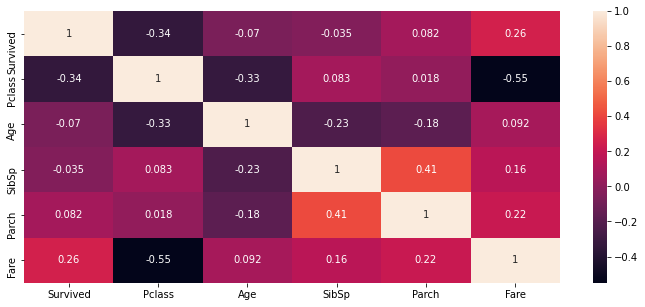

In [21]:
plt.figure(figsize=(12,5))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

# Data Prediction

In [22]:
sex=pd.get_dummies(train_data["Sex"],drop_first=True)
Embark=pd.get_dummies(train_data["Embarked"],drop_first=True)
sex_test=pd.get_dummies(test_data["Sex"],drop_first=True)
Embark_test=pd.get_dummies(test_data["Embarked"],drop_first=True)

In [23]:
train_data.drop(columns=["Sex","Embarked"],axis=1,inplace=True)
train_data
test_data.drop(columns=['Sex','Embarked'],inplace=True)

In [24]:
train_data=pd.concat([train_data,sex,Embark],axis=1)
train_data
test_data=pd.concat([test_data,sex_test,Embark_test],axis=1)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   male    418 non-null    uint8  
 6   Q       418 non-null    uint8  
 7   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


In [25]:
# Separate out the features and targets
features=train_data.iloc[:,1:]
targets=train_data.iloc[:,0]

# Split into 70% training and 30% testing set
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train

(623, 8)
(268, 8)
(623,)
(268,)


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
445,1,4.000000,0,2,81.8583,1,0,1
650,3,29.699118,0,0,7.8958,1,0,1
172,3,1.000000,1,1,11.1333,0,0,1
450,2,36.000000,1,2,27.7500,1,0,1
314,2,43.000000,1,1,26.2500,1,0,1
...,...,...,...,...,...,...,...,...
106,3,21.000000,0,0,7.6500,0,0,1
270,1,29.699118,0,0,31.0000,1,0,1
860,3,41.000000,2,0,14.1083,1,0,1
435,1,14.000000,1,2,120.0000,0,0,1


In [26]:

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
predicted= model.predict(x_test)
pred_df=pd.DataFrame({"Actual":y_test,"pred":predicted})
acc_gaussian=accuracy_score(y_test,predicted) * 100
print(pred_df)

     Actual  pred
709       1     0
439       0     0
840       0     0
720       1     1
39        1     1
..      ...   ...
821       1     0
633       0     0
456       0     0
500       0     0
430       1     0

[268 rows x 2 columns]


In [27]:
report=classification_report(y_test,predicted)
print("GuassianNB report \n",report)

GuassianNB report 
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.75      0.75      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



In [28]:
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
predicted= model.predict(x_test)
pred_df=pd.DataFrame({"Actual":y_test,"pred":predicted})
acc_knn=accuracy_score(y_test,predicted) * 100
print(pred_df)

     Actual  pred
709       1     0
439       0     0
840       0     0
720       1     1
39        1     0
..      ...   ...
821       1     1
633       0     0
456       0     0
500       0     0
430       1     0

[268 rows x 2 columns]


In [29]:
report=classification_report(y_test,predicted)
print("KNN report \n",report)

KNN report 
               precision    recall  f1-score   support

           0       0.70      0.84      0.76       157
           1       0.68      0.49      0.57       111

    accuracy                           0.69       268
   macro avg       0.69      0.66      0.67       268
weighted avg       0.69      0.69      0.68       268



In [30]:
cm=confusion_matrix(y_test,predicted)
cm

array([[132,  25],
       [ 57,  54]])

In [31]:
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}
#Parameter grid for the gridsearch
#These are the parameters that the gridsearch with methodical work through
#to determine the best set for the task at hand.
params = {
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5],
    'criterion' :['gini', 'entropy']
}
#This parameter grid has been shortened to help the runtime of this notebook.

In [32]:
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}
classifier =RandomForestClassifier(max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator=classifier,param_grid=params,scoring='accuracy',cv=5,verbose=True)
grid_search.fit(x_train, y_train)
predicted=grid_search.predict(x_test)
pred_df=pd.DataFrame({"Actual":y_test,"pred":predicted})
acc_random_forest=accuracy_score(y_test,predicted) * 100
print(pred_df)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.3min finished


     Actual  pred
709       1     0
439       0     0
840       0     0
720       1     1
39        1     1
..      ...   ...
821       1     0
633       0     0
456       0     0
500       0     0
430       1     0

[268 rows x 2 columns]


In [33]:
cm=confusion_matrix(y_test,predicted)
cm

array([[144,  13],
       [ 38,  73]])

In [34]:
report=classification_report(y_test,predicted)
print("RandomForestClassifier report \n",report)

RandomForestClassifier report 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       157
           1       0.85      0.66      0.74       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.80       268



In [35]:
classifier =SVC()
classifier.fit(x_train, y_train)
predicted=classifier.predict(x_test)
pred_df=pd.DataFrame({"Actual":y_test,"pred":predicted})
acc_svc=accuracy_score(y_test,predicted) * 100
print(pred_df)

     Actual  pred
709       1     0
439       0     0
840       0     0
720       1     0
39        1     0
..      ...   ...
821       1     0
633       0     0
456       0     0
500       0     0
430       1     0

[268 rows x 2 columns]


In [36]:
cm=confusion_matrix(y_test,predicted)
cm

array([[148,   9],
       [ 82,  29]])

In [37]:
report=classification_report(y_test,predicted)
print("SVC report \n",report)

SVC report 
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       157
           1       0.76      0.26      0.39       111

    accuracy                           0.66       268
   macro avg       0.70      0.60      0.58       268
weighted avg       0.69      0.66      0.61       268



In [38]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
predicted = model.predict(x_test)
pred_df=pd.DataFrame({"Actual":y_test,"pred":predicted})
acc_log=accuracy_score(y_test,predicted) * 100
print(pred_df)

     Actual  pred
709       1     0
439       0     0
840       0     0
720       1     1
39        1     1
..      ...   ...
821       1     0
633       0     0
456       0     0
500       0     0
430       1     0

[268 rows x 2 columns]


"str' object has no attribute 'decode' logistic regression"
This error was shown only with logistic regression but if you wrote "solver='liblinear'",it will be solved

In [39]:
cm=confusion_matrix(y_test,predicted)
cm

array([[137,  20],
       [ 33,  78]])

In [40]:
report=classification_report(y_test,predicted)
print("Logistic regression report \n",report)

Logistic regression report 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [41]:
decision_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
decision_tree.fit(x_train, y_train)
predicted = decision_tree.predict(x_test)
pred_df=pd.DataFrame({"Actual":y_test,"pred":predicted})
acc_DC=accuracy_score(y_test,predicted) * 100
print(pred_df)

     Actual  pred
709       1     0
439       0     0
840       0     0
720       1     1
39        1     1
..      ...   ...
821       1     0
633       0     0
456       0     0
500       0     0
430       1     0

[268 rows x 2 columns]


In [42]:
avc=SVC(probability=True,kernel="linear")
model = AdaBoostClassifier(n_estimators=5000,base_estimator=avc)

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
predicted= model.predict(x_test)
pred_df=pd.DataFrame({"Actual":y_test,"pred":predicted})
acc_ada=accuracy_score(y_test,predicted) * 100
print(pred_df)

     Actual  pred
709       1     0
439       0     0
840       0     0
720       1     0
39        1     0
..      ...   ...
821       1     0
633       0     0
456       0     0
500       0     0
430       1     0

[268 rows x 2 columns]


In [43]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes','Desicion Tree','Adaboost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_DC, acc_ada]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Desicion Tree,81.716418
3,Random Forest,80.970149
2,Logistic Regression,80.223881
4,Naive Bayes,79.477612
1,KNN,69.402985
0,Support Vector Machines,66.044776
6,Adaboost,58.582090


### We observed that the the logistic regression has the best accuracy

In [44]:
#sc=StandardScaler()
#test_data=sc.fit_transform(test_data)

In [45]:
decision_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(test_data)
#pred_df=pd.DataFrame({"Actual":y_test,"pred":predicted})
#print(pred_df)
y_pred

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.3min finished


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
output = pd.DataFrame({'PassengerId': test_df["PassengerId"], 'Survived': y_pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved.")

Your submission was successfully saved.


In [47]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
